# Laboratorio 4
## 1) Problema minimi quadrati
Data una matrice $A$ di dimensioni $m × n$ con $m \ge n$ ed un vettore $y$ di $m$ componenti, il problema dei minimi quadrati è il seguente: 
$$\alpha^\ast = \arg \min_{\alpha}\|A\alpha − y\|^2_2$$
Questo problema di minimo può essere risolto in due modi:
+ **Metodo delle equazioni normali.** Se A ha rango massimo il problema di minimo può essere riscritto in maniera equivalente come segue: $A^T A\alpha = A^T y$. Questo sistema si può risolvere utilizzando la fattorizzazione LU o di Cholesky (dato che la matrice $A^T A$ è simmetrica).
+ **SVD.** Se A non ha rango massimo il problema è sottodeterminato, quindi ha più di una soluzione. In questo caso si considera la decomposizione SVD della matrice $A = USV^T$ dove $U \in \mathbb{R}^{m×m}$ e $V^T \in \mathbb{R}^{n×n}$ matrici ortogonali e $S \in \mathbb{R}^{m×n}$ diagonale. Da questa decomposizione si può calcolare esplicitemente la soluzione di minima norma del problema di minimi quadrati come segue: 
$$\alpha = \sum_{i=0}^r \dfrac{(u_i^T \: y) \: v_i}{s_i}.$$

Assegnata una matrice $A$ di numeri casuali di dimensione $m × n$ con $m > n$, generata utilizzando la funzione `np.random.rand`, scegliere un vettore $\alpha$ (per esempio con elementi costanti) come soluzione per creare un problema test e calcolare il termine noto $y = A\alpha$.
Definito quindi il problema di minimi quadrati con la matrice A ed il termine noto $y$ calcolato:
+ Calcolare la soluzione del problema risolvendo le equazioni normali mediante la fattorizzazione LU e Cholesky.
+ Calcolare la soluzione del problema usando la SVD della matrice A.
+ Calcolare l’errore relativo delle soluzioni trovate, rispetto al vettore $\alpha$, soluzione esatta,  utilizzata per generare il problema test.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor as LUdec 

m = 100
n = 10

A = np.random.rand(m, n)
alpha_test = np.ones(n)
y = np.matmul(A,alpha_test)
print("alpha test", alpha_test)

ATA = A.T@A
ATy = A.T@y
lu, piv = LUdec(ATA)
alpha_LU = scipy.linalg.lu_solve((lu,piv), ATy)
print("alpha LU", alpha_LU)

L = scipy.linalg.cholesky(ATA)
x = scipy.linalg.solve_triangular(np.transpose(L), ATy, lower=True)
alpha_chol = scipy.linalg.solve_triangular(L, x, lower=False)
print("alpha chol", alpha_chol)

U, s, Vh = scipy.linalg.svd(A)
print("Shape of U:", U.shape)
print("Shape of s:", s.shape)
print("Shape of V:", Vh.T.shape)
alpha_svd = np.zeros(s.shape)
for i in range(n):
  ui = U[:, i]
  vi = Vh[i, :]
  alpha_svd += (np.matmul(np.transpose(ui),y)) * vi / s[i] 
print("alpha SVD", alpha_svd)

print("Errore relativo LU:", np.linalg.norm(alpha_LU-alpha_test)/np.linalg.norm(alpha_test))
print("Errore relativo Cholesky:", np.linalg.norm(alpha_chol-alpha_test)/np.linalg.norm(alpha_test))
print("Errore relativo SVD:", np.linalg.norm(alpha_svd-alpha_test)/np.linalg.norm(alpha_test))

alpha test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
alpha LU [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
alpha chol [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape of U: (100, 100)
Shape of s: (10,)
Shape of V: (10, 10)
alpha SVD [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Errore relativo LU: 4.905879450233903e-15
Errore relativo Cholesky: 6.492954058688621e-15
Errore relativo SVD: 1.5728377204805703e-15


## 2) Approssimazione di un set di dati tramite Minimi Quadrati
Sia $\{(x_i , y_i)\}^m_{i=0}$ un set di dati, che devono essere approssimati da un polinomio di grado $n \in \mathbb{N}$ fissato.
$$
p(x) = \alpha_0 + \alpha_1 x + \dots+ \alpha_n x^n
$$
Per calcolare i coefficienti del polinomio si deve risolvere un problema di minimi quadrati in cui la matrice A è definita come segue: 
$$
A = \begin{bmatrix} 1 & x_0 & x^2_0 & \dots & x^n_0\\ 1 & x_1 & x^2_1 & \dots & x^n_1\\ \vdots & \vdots & \vdots & \vdots & \vdots\\ 1 & x_m & x^2_m & \dots & x^n_m \end{bmatrix}
$$
Mentre il termine noto è:
$$
y = \begin{bmatrix} y_0\\ \vdots\\ y_m \end{bmatrix}
$$

Date le seguenti funzioni:
+ $f(x) = exp(x/2) \quad x \in [-1,1]$
+ $f(x) = \dfrac{1}{1+25x^2} \quad x \in [-1,1]$
+ $f(x) = sin(x) + cos(x) \quad x \in [0, 2\pi]$
Si eseguano le seguenti richieste per ciascuna delle funzioni date:
1. Calcolare $m = 10$ coppie di punti $(x_i, f(x_i))$.
2. Per $n$ fissato, calcolare una soluzione del problema di minimi quadrati, descritto sopra, utilizzando un metodo a scelta tra quelli utilizzati nell’esercizio precedente.
3. Per ciascun valore di $n \in \{1, 2, 3, 5, 7\}$, creare una figura con il grafico della funzione esatta $f(x)$ insieme a quello del polinomio di approssimazione $p(x)$, evidenziando gli $m$ punti noti.
4. Per ciascun valore di $n \in \{1, 2, 3, 5, 7\}$, calcolare e stampare il valore del residuo in norma 2 commesso nei punti $x_i$.

In [20]:
m = 10
m_plot = 100
n_fixed = 9

def approx(x, y, n, pos=0, plot=True):
    A = np.zeros((m, n+1))
    for i in range(n+1):
      A[:, i] = x ** i
    U, s, Vh = scipy.linalg.svd(A)
    alpha_svd = np.zeros(n+1)
    for i in range(n+1):
      ui = U[:, i]
      vi = Vh[i, :]
      alpha_svd += (np.matmul(np.transpose(ui),y)) * vi / s[i]
    if not plot:
        print("Grado:", n)
        print("SVD:", alpha_svd, "\n")
        return
    
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))
    for i in range(n+1):
      A_plot[:, i] = x_plot ** i
    y_interpolation = np.matmul(A_plot, alpha_svd)
    ax = plt.subplot(2, 3, pos)
    plt.plot(x, y, "o")
    plt.plot(x_plot, y_interpolation, "r")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Grado " + str(n))
    plt.grid()
    res = np.linalg.norm(y - np.matmul(A, alpha_svd))
    print(f"Residuo grado {n}: {res}\n")
    
def plotApprox(x,y,x_real,y_real,title=""):
    plt.figure()
    ax = plt.subplot(2, 3, 1)
    plt.plot(x_real, y_real)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.grid()
    approx(x, y, n_fixed, plot=False)
    # Calcola e plotta le interpolazioni per i gradi 1, 2, 3, 5, 7
    r = [1, 2, 3, 5, 7]
    for i in range(len(r)):
      approx(x, y, r[i], i+2)
    plt.tight_layout()
    plt.show()

Grado: 9
SVD: [1.00000000e+00 5.00000000e-01 1.25000000e-01 2.08333333e-02
 2.60416675e-03 2.60416671e-04 2.17010276e-05 1.55008280e-06
 9.74308368e-08 5.40726217e-09] 

Residuo grado 1: 0.145433382884694

Residuo grado 2: 0.012936563157837878

Residuo grado 3: 0.0008263727821353013

Residuo grado 5: 1.477729918707959e-06

Residuo grado 7: 8.737821526123543e-10


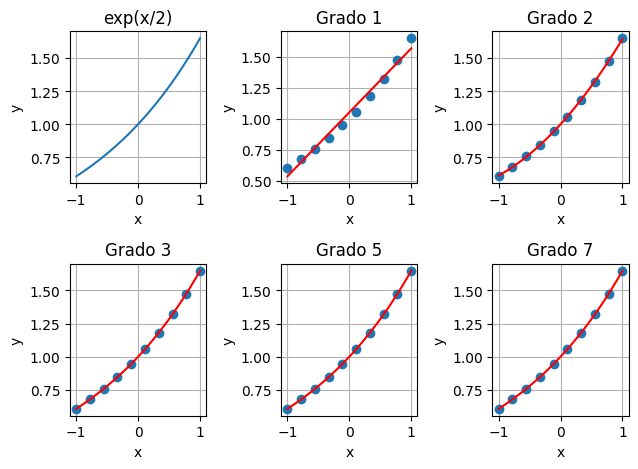

In [21]:
# f(x) = exp(x/2) x ∈ [−1,1]
x = np.linspace(-1,1,m)
y = np.exp(x/2)
x_real = np.linspace(-1,1,m_plot)
y_real = np.exp(x_real/2)
plotApprox(x,y,x_real,y_real,"exp(x/2)")

Grado: 9
SVD: [ 8.61538152e-01 -3.29114189e-14 -8.26092333e+00  3.49664299e-13
  3.07285300e+01 -1.39679438e-12 -4.49154581e+01  2.09190777e-12
  2.16247748e+01 -1.01043877e-12] 

Residuo grado 1: 0.8519889898800778

Residuo grado 2: 0.5751808755886042

Residuo grado 3: 0.5751808755886041

Residuo grado 5: 0.3631838354754461

Residuo grado 7: 0.1939183846601575


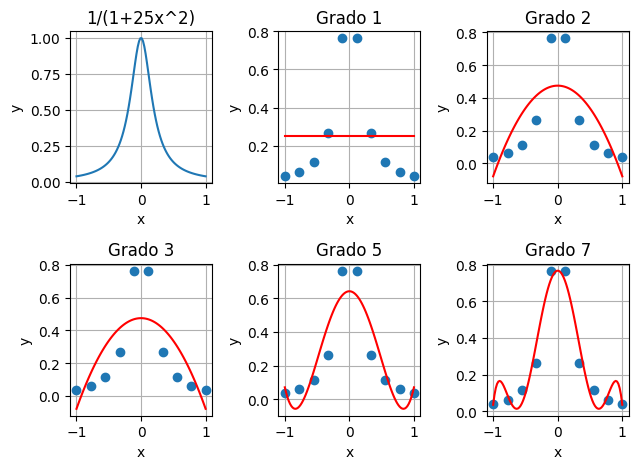

In [22]:
# f(x) = 1/(1+25x^2) x ∈ [−1,1]
x = np.linspace(-1,1,m)
y = 1/(1+25*(x**2))
x_real = np.linspace(-1,1,m_plot)
y_real = 1/(1+25*(x_real**2))
plotApprox(x,y,x_real,y_real,"1/(1+25x^2)")

Grado: 9
SVD: [ 1.00000000e+00  1.00220513e+00 -5.08527514e-01 -1.53701153e-01
  3.14535288e-02  1.28292784e-02 -2.43887396e-03 -1.21889995e-04
  4.50547545e-05 -2.29369460e-06] 

Residuo grado 1: 2.8367505921049365

Residuo grado 2: 1.7952974022498318

Residuo grado 3: 0.80077077177318

Residuo grado 5: 0.06559431617548454

Residuo grado 7: 0.0016911098620954945


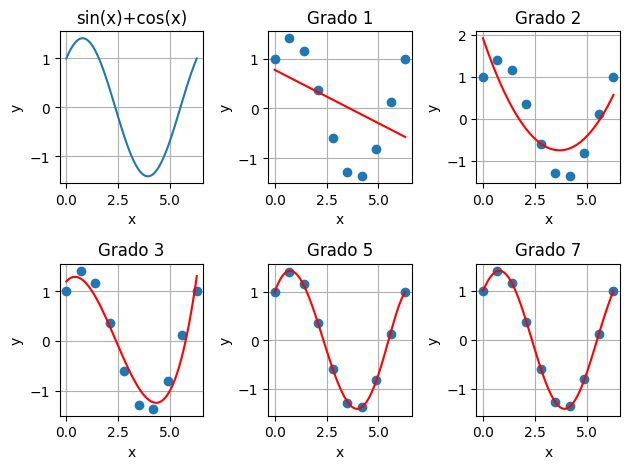

In [23]:
# f(x) = sin(x)+cos(x) x ∈ [0,2π]
x = np.linspace(0,2*np.pi,m)
y = np.sin(x)+np.cos(x)
x_real = np.linspace(0,2*np.pi,m_plot)
y_real = np.sin(x_real)+np.cos(x_real)
plotApprox(x,y,x_real,y_real,"sin(x)+cos(x)")